# Visualizing the South Sudan 2008 Census by State, Gender, and Age Category with Plotnine

In this comprehensive tutorial, I will demonstrate how to visualize the South Sudan 2008 Census data using the `plotnine` library in Python. This tutorial will guide you through the following steps:

1) __Creating Bar Graphs__: Learn how to plot basic bar graphs to represent the census data effectively.
2) __Using Facet Grid__: Discover the `facet_grid` functionality in plotnine to create multiple subplots, allowing for a more granular and insightful view of the data across different states, genders, and age categories.
3) __Customizing Plots__: Hone your skills in customizing bar graphs by adjusting aesthetics, themes, labels, and other graphical parameters to make your visualizations more informative and visually appealing.

By the end of this tutorial, you will have a solid understanding of how to use `plotnine` for data visualization, particularly in the context of categorical data analysis. This tutorial is designed for both beginners and intermediate users of plotnine who are looking to enhance their data visualization skills.

## Getting Started

To begin, I will load the necessary libraries for this tutorial. These include:

- `polars` for cleaning and transforming data.
- `polars.selectors` for working with columns.
- `plotnine` for creating visualizations.
- `label_number` from the mizani package for formatting numbers in our plots.

This setup ensures we have all the tools we need for data manipulation and visualization as we work through the South Sudan 2008 Census data.

In [1]:
# Loading Libraries
import polars as pl
import polars.selectors as cs
from plotnine import *
from mizani.labels import label_number

## Importing the Data

In this section, I will download my favorite dataset, the South Sudan 2008 census data, for the purpose of this tutorial. I will use the polars package to load, clean, and transform the data. To save time, I will utilize custom functions that I built in previous tutorials.

Here’s how to import and prepare the data:

In [2]:
# Load and read in the data
url = 'https://raw.githubusercontent.com/tongakuot/python_tutorials/main/00_data/ss_2008_census_data_raw.csv'

# Tell polars how to label missing values
census_raw = pl.read_csv(url, null_values='NA')

# Inspect the data
print(census_raw)

shape: (453, 10)
┌───────────────┬─────────────────────────────────┬───────────────────┬──────────┬───┬──────────┬───────┬─────────┬────────┐
│ Region        ┆ Region Name                     ┆ Region - RegionId ┆ Variable ┆ … ┆ Age Name ┆ Scale ┆ Units   ┆ 2008   │
│ ---           ┆ ---                             ┆ ---               ┆ ---      ┆   ┆ ---      ┆ ---   ┆ ---     ┆ ---    │
│ str           ┆ str                             ┆ str               ┆ str      ┆   ┆ str      ┆ str   ┆ str     ┆ i64    │
╞═══════════════╪═════════════════════════════════╪═══════════════════╪══════════╪═══╪══════════╪═══════╪═════════╪════════╡
│ KN.A2         ┆ Upper Nile                      ┆ SS-NU             ┆ KN.B2    ┆ … ┆ Total    ┆ units ┆ Persons ┆ 964353 │
│ KN.A2         ┆ Upper Nile                      ┆ SS-NU             ┆ KN.B2    ┆ … ┆ 0 to 4   ┆ units ┆ Persons ┆ 150872 │
│ KN.A2         ┆ Upper Nile                      ┆ SS-NU             ┆ KN.B2    ┆ … ┆ 5 to 9   ┆ units ┆ Pe

This approach leverages the `polars` package for efficient data manipulation, ensuring our dataset is ready for visualization.

## Cleaning and Transforming the Data with Custom Function(s)

One of the many things I love about Python is the ability to wrap my functions in a module and import them anytime I want to use them, just as I would with any other Python functions or libraries. In the following code snippet, I will import `censuspy`, which contains my custom functions for wrangling the South Sudan 2008 census data. The first function I will use is `tweak_census`, and the second function, which I will use in the latter sections, is `summarize_census`, which groups the cleaned data by any columns of choice.

The `tweak_census` function takes three arguments: __a DataFrame__, __grouping_cols__ (columns to group the data by), and a __condition__ that indicates how to filter or remove unwanted rows. Lastly, I will use the `print` method to display the output. As you will see below, our cleaned dataset contains 140 observations (rows) and 5 variables (columns).

In [3]:
# Let's import our custom function censuspy as cy
import censuspy as cy
census = (
    cy.tweak_census(
    census_raw, 
    grouping_cols=['former_region', 'state', 'gender', 'category'], 
    condition=~((pl.col('gender') == 'Total') | (pl.col('category') == 'Total')) 
    )
)

# inspect the first 5 rows
print(census)

shape: (140, 5)
┌────────────────────────┬────────────────────────┬────────┬──────────────┬────────┐
│ former_region          ┆ state                  ┆ gender ┆ category     ┆ total  │
│ ---                    ┆ ---                    ┆ ---    ┆ ---          ┆ ---    │
│ str                    ┆ str                    ┆ str    ┆ str          ┆ i64    │
╞════════════════════════╪════════════════════════╪════════╪══════════════╪════════╡
│ Greater Upper Nile     ┆ Jonglei                ┆ Male   ┆ 0-14         ┆ 338443 │
│ Greater Upper Nile     ┆ Jonglei                ┆ Female ┆ 0-14         ┆ 263646 │
│ Greater Equatoria      ┆ Central Equatoria      ┆ Male   ┆ 0-14         ┆ 242247 │
│ Greater Upper Nile     ┆ Upper Nile             ┆ Male   ┆ 0-14         ┆ 237461 │
│ Greater Bahr el Ghazal ┆ Warrap                 ┆ Male   ┆ 0-14         ┆ 230854 │
│ …                      ┆ …                      ┆ …      ┆ …            ┆ …      │
│ Greater Bahr el Ghazal ┆ Lakes                 

## Summarization and Visualization
In the following sections, I will first summarize the data by 'category' and then by 'state' and 'gender'. After summarizing the data, I will guide you through various ways to plot and customize the visualizations using the plotnine library. With practice, you will become proficient and will be able to elevate your data visualization skills to the next level.

In [11]:
# Group by and sumarize
age = cy.summarize_census(census, cols=['category'])

# Inspect the summary
print(age)

shape: (7, 3)
┌──────────────┬─────────┬────────┐
│ category     ┆ total   ┆ labels │
│ ---          ┆ ---     ┆ ---    │
│ str          ┆ i64     ┆ f64    │
╞══════════════╪═════════╪════════╡
│ 0-14         ┆ 3659337 ┆ 3.66   │
│ 15-24        ┆ 1628835 ┆ 1.63   │
│ 25-34        ┆ 1234926 ┆ 1.23   │
│ 35-44        ┆ 815517  ┆ 0.82   │
│ 45-54        ┆ 473365  ┆ 0.47   │
│ 55-64        ┆ 237426  ┆ 0.24   │
│ 65 and above ┆ 211084  ┆ 0.21   │
└──────────────┴─────────┴────────┘
shape: (7, 3)
┌──────────────┬─────────┬────────┐
│ category     ┆ total   ┆ labels │
│ ---          ┆ ---     ┆ ---    │
│ str          ┆ i64     ┆ f64    │
╞══════════════╪═════════╪════════╡
│ 0-14         ┆ 3659337 ┆ 3.66   │
│ 15-24        ┆ 1628835 ┆ 1.63   │
│ 25-34        ┆ 1234926 ┆ 1.23   │
│ 35-44        ┆ 815517  ┆ 0.82   │
│ 45-54        ┆ 473365  ┆ 0.47   │
│ 55-64        ┆ 237426  ┆ 0.24   │
│ 65 and above ┆ 211084  ┆ 0.21   │
└──────────────┴─────────┴────────┘


In the above output, I also calculated the labels to avoid creating them during the plotting session. Although I don't believe in the authenticity of this dataset, the results nonetheless reflect the reality of the impacts of the 21-year civil war between North and South Sudan. During that period, we lost millions of lives.

### Visualizing the 2008 South Sudan Census by Age Category
In this section, I will plot a basic bar graph by initializing the canvas with ggplot() and then adding the bars with geom_col(). The geom_col() method is used when working with already summarized data; however, you can also plot a bar graph with the geom_bar() method.

> geom_bar() makes the height of the bar proportional to the number of cases in each group. geom_col() is an alternative version of geom_bar that maps the height of bars to an existing variable in your data. If you want the height of the bar to represent a count of cases, use geom_bar() - [https://plotnine.org/reference/geom_col](https://plotnine.org/reference/geom_col.html#plotnine.geom_col).

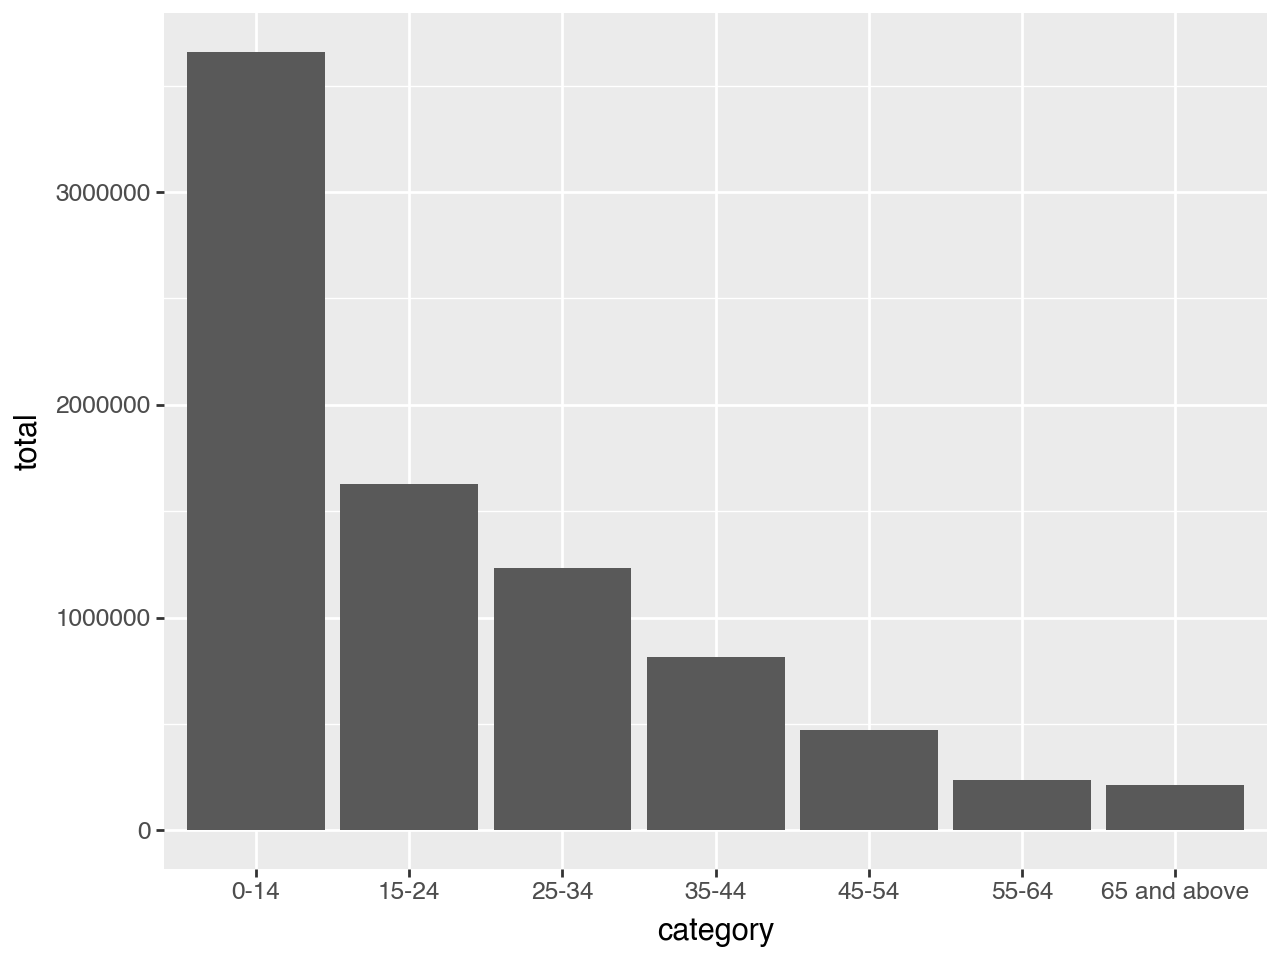

In [15]:
# Visualize the 2008 South Sudan Census by age category

(
    ggplot(age, aes('category', 'total'))
    + geom_col(stat='identity', show_legend=False) 
)

## Enhancing Our Visual to Look Professional

Since my objective in this tutorial is to learn `plotnine` and help others learn it as well, I will take customization to the next level by making our plot elegant and appealing. It is always imperative to remove any unnecessary parts that clutter the visual.

To enhance our visual, I will add text labels with the `geom_text()` function. I have already calculated these values in the preceding sections, so I will format them by setting `format_string='{}M'` to append 'M' (for million) to the values. Additionally, I will adjust the vertical alignment of the labels by adding 70,000 to each value and set the label size to 7.

Next, I will adjust the y-axis scale with `scale_y_continuous()` and transform the scale with the `label_number()` function from the `mizani` library. I will use `theme_tufte()` to transform the plot, add titles and subtitles with the `labs()` method, and then customize the plot title settings with `theme()`.

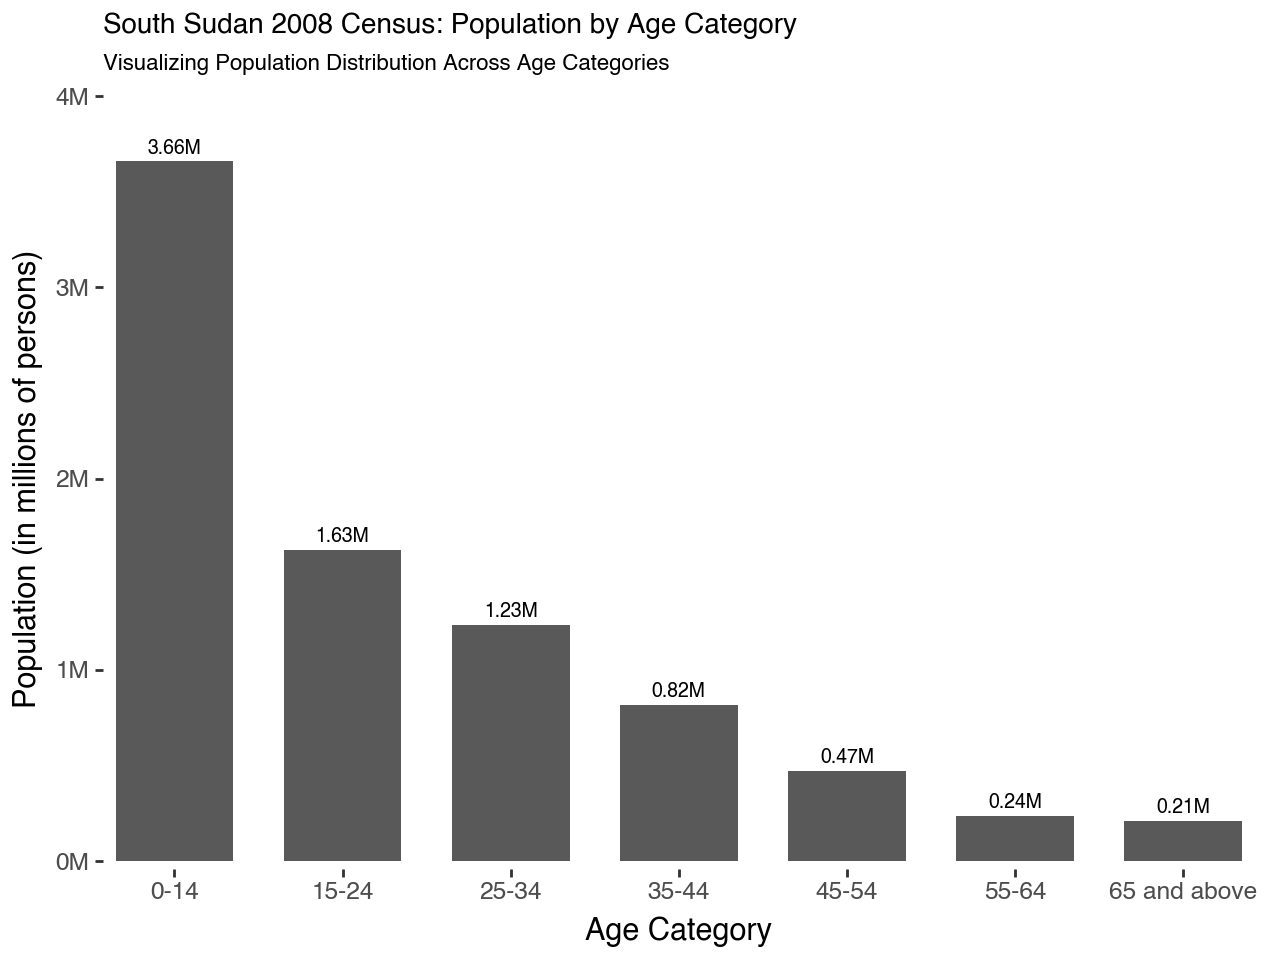

In [27]:
# Visualize the 2008 South Sudan Census by age category
(
    ggplot(age, aes('category', 'total'))
    + geom_col(stat='identity', width=0.7) 
    + geom_text(aes(label='labels'), format_string='{}M', nudge_y=70_000, size=7)
    + scale_y_continuous(
        limits=(0, 4_000_000), 
        expand=(0.01, 0.01),
        labels=label_number(scale=1e-6, suffix='M')
    )
    + scale_x_discrete(expand=(0.01, 0.01))
    + theme_tufte() 
    + labs(
        x='Age Category',
        y='Population (in millions of persons)',
        title='South Sudan 2008 Census: Population by Age Category',
        subtitle='Visualizing Population Distribution Across Age Categories'
    )
    + theme(
        plot_title=element_text(size=10, ha='left', margin={'t': 10, 'b': 5}),
        plot_subtitle=element_text(size=8, ha='left', margin={'b': 5}),
    )
)

## Enhancing Our Plot Further

In the code snippet below, I will remove the y-axis text and ticks because they are redundant. We could also remove the axis titles because the graph is self-explanatory, but I will leave them intact in this tutorial.


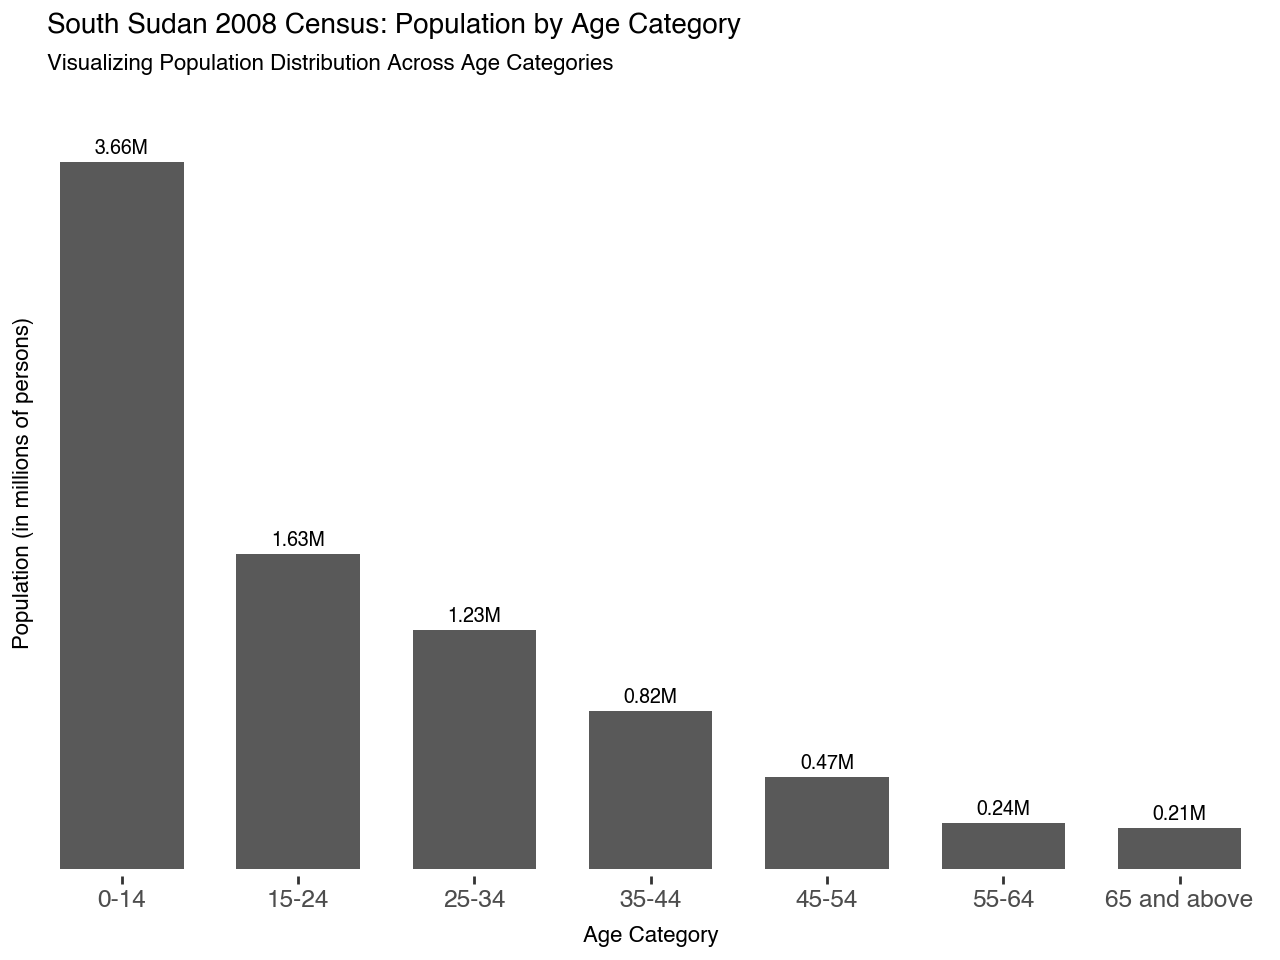

In [9]:
# Visualize the 2008 South Sudan Census by Former Region
(
    ggplot(age, aes('category', 'total'))
    + geom_col(stat='identity', width=0.7) 
    + geom_text(aes(label='labels'), format_string='{}M', nudge_y=70_000, size=7)
    + scale_y_continuous(
        limits=(0, 4_000_000), 
        expand=(0.01, 0.01),
        labels=label_number(scale=1e-6, suffix='M')
    )
    + scale_x_discrete(expand=(0.01, 0.01))
    + theme_tufte() 
    + labs(
        x='Age Category',
        y='Population (in millions of persons)',
        title='South Sudan 2008 Census: Population by Age Category',
        subtitle='Visualizing Population Distribution Across Age Categories'
    )
    + theme(
        plot_title=element_text(size=10, ha='left', margin={'t': 10, 'b': 5}),
        plot_subtitle=element_text(size=8, ha='left', margin={'b': 5}),
        axis_title_x=element_text(margin={'t': 15}),
        axis_title=element_text(size=8),
        axis_text_y=element_blank(),
        axis_ticks_y=element_blank(),
    )
)

### Visualizing the 2008 South Sudan Census by State and Gender

In the next section, I will group and summarize the data by state and gender using the custom function I imported earlier.

In [10]:
# Compute state totals by gender
gender = cy.summarize_census(census, cols=['state', 'gender'])

# Inspect the summary
print(gender)

shape: (20, 4)
┌────────────────────────┬────────┬────────┬────────┐
│ state                  ┆ gender ┆ total  ┆ labels │
│ ---                    ┆ ---    ┆ ---    ┆ ---    │
│ str                    ┆ str    ┆ i64    ┆ f64    │
╞════════════════════════╪════════╪════════╪════════╡
│ Jonglei                ┆ Male   ┆ 734327 ┆ 0.73   │
│ Jonglei                ┆ Female ┆ 624275 ┆ 0.62   │
│ Central Equatoria      ┆ Male   ┆ 581722 ┆ 0.58   │
│ Upper Nile             ┆ Male   ┆ 525430 ┆ 0.53   │
│ Central Equatoria      ┆ Female ┆ 521835 ┆ 0.52   │
│ …                      ┆ …      ┆ …      ┆ …      │
│ Western Equatoria      ┆ Female ┆ 300586 ┆ 0.3    │
│ Unity                  ┆ Male   ┆ 300247 ┆ 0.3    │
│ Unity                  ┆ Female ┆ 285554 ┆ 0.29   │
│ Western Bahr el Ghazal ┆ Male   ┆ 177040 ┆ 0.18   │
│ Western Bahr el Ghazal ┆ Female ┆ 156391 ┆ 0.16   │
└────────────────────────┴────────┴────────┴────────┘
shape: (20, 4)
┌────────────────────────┬────────┬────────┬────────

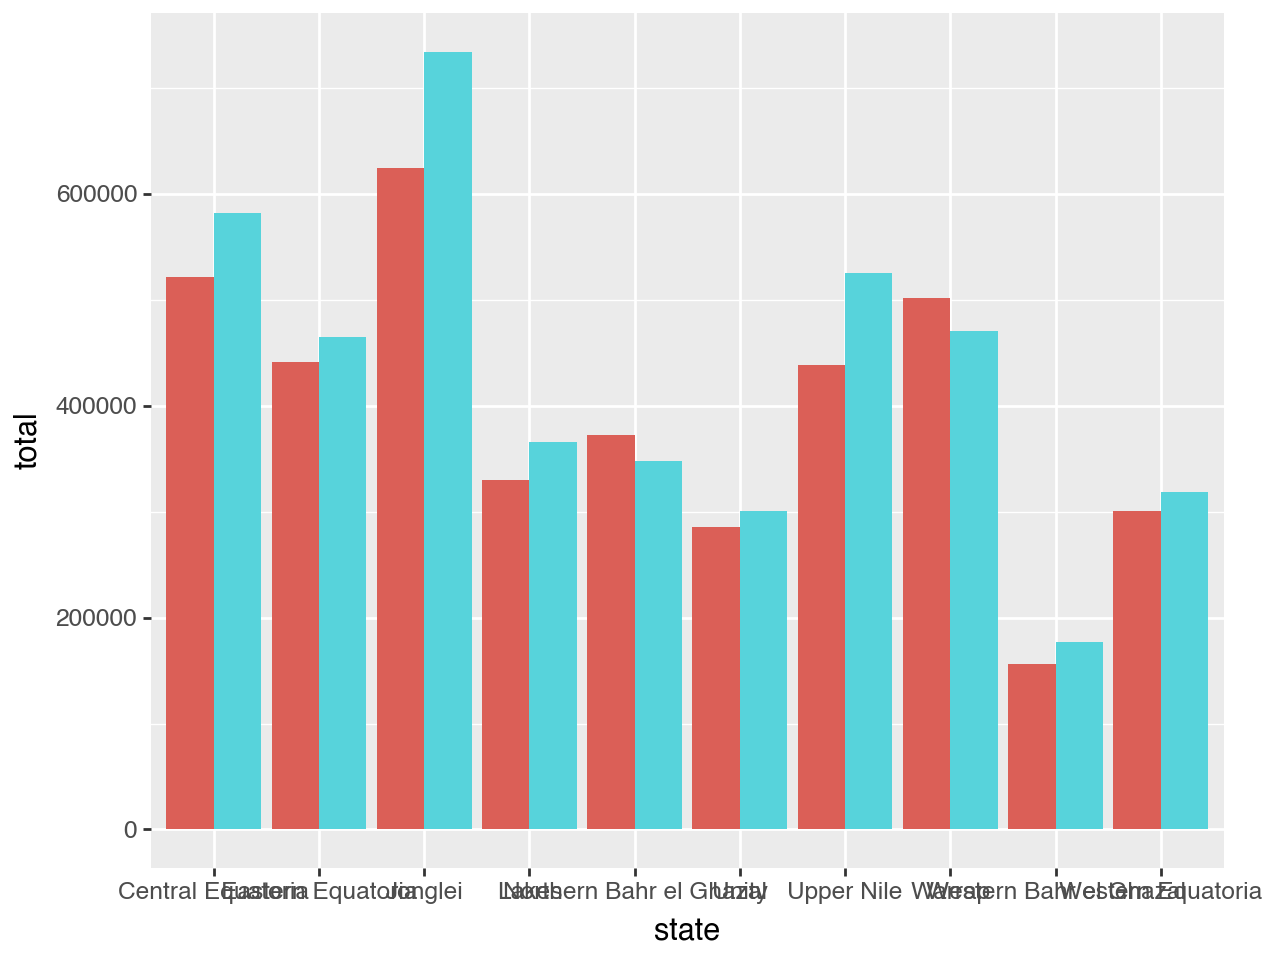

In [18]:
# Visualize the 2008 South Sudan Census by state and gender

(
    ggplot(gender, aes('state', 'total', fill='gender'))
    + geom_col(stat='identity', position='dodge', show_legend=False) 
)

As you can see in the above image, the x-axis labels overlap, so I will transform the plot into a horizontal bar plot using the `coord_flip()` function. It's advisable to rotate the graph horizontally when you have long labels for better visibility. Also, it's imperative to always order the bars either in ascending or descending order, depending on your objective. I have been struggling to accomplish this until last night when __Andrei Mircea Stoian__ directed me to the reorder() function (__Many thanks to Andrei__), which solved my issue. To unstack the bars, set position to 'dodge' within the `geom_col()` function. Additionally, I changed the colors to less bright ones using the `scale_fill_manual()` function.

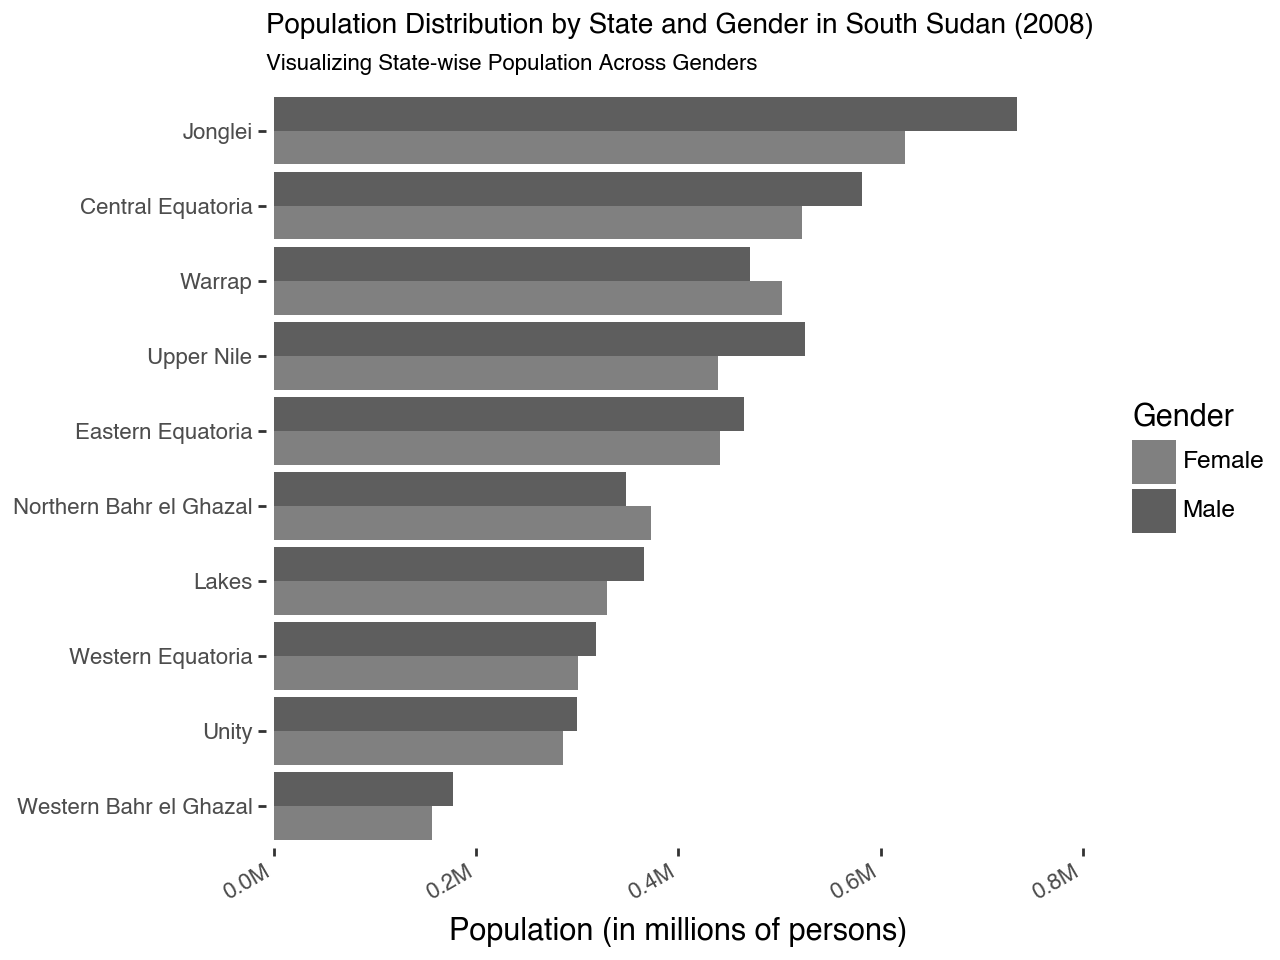

In [26]:
# Visualize the 2008 South Sudan Census by Former Region

(
    ggplot(gender, aes('reorder(state, total)', 'total', fill='gender'))
    + geom_col(position='dodge') 
    + scale_x_discrete(expand=(0.01, 0.01))
    + scale_y_continuous(
        limits=(0, 800_000), 
        expand=(0.01, 0.01),
        labels=label_number(scale=1e-6, suffix='M')
    )
    + scale_fill_manual(values=['grey', '#5E5E5E'])
    + coord_flip()
    + theme_tufte()
    + labs(
        x='',
        y='Population (in millions of persons)',
        title='Population Distribution by State and Gender in South Sudan (2008)',
        subtitle='Visualizing State-wise Population Across Genders',
        fill='Gender'
    )
    + theme(
        plot_title=element_text(size=10, margin={'t': 10, 'b': 5}, ha='left'),
        plot_subtitle=element_text(size=8, margin={'b': 5}, ha='left'),
        axis_text=element_text(size=8),
        axis_text_x=element_text(rotation=30, hjust=1),
        axis_title_y=element_text(size=8)
    )
)

## Transforming the Plot with facet_grip

While side-by-side bar plots may suffice, there are times when we need better visualization to make sense of our data. In this tutorial, I will transform the above plot using the `facet_grip()` function.

According to the `plotnine` website,

> `facet_grid()` is used to form a grid of plots, where the rows and columns of the grid are set by the faceting variables. It is useful for visualising two discrete variables.

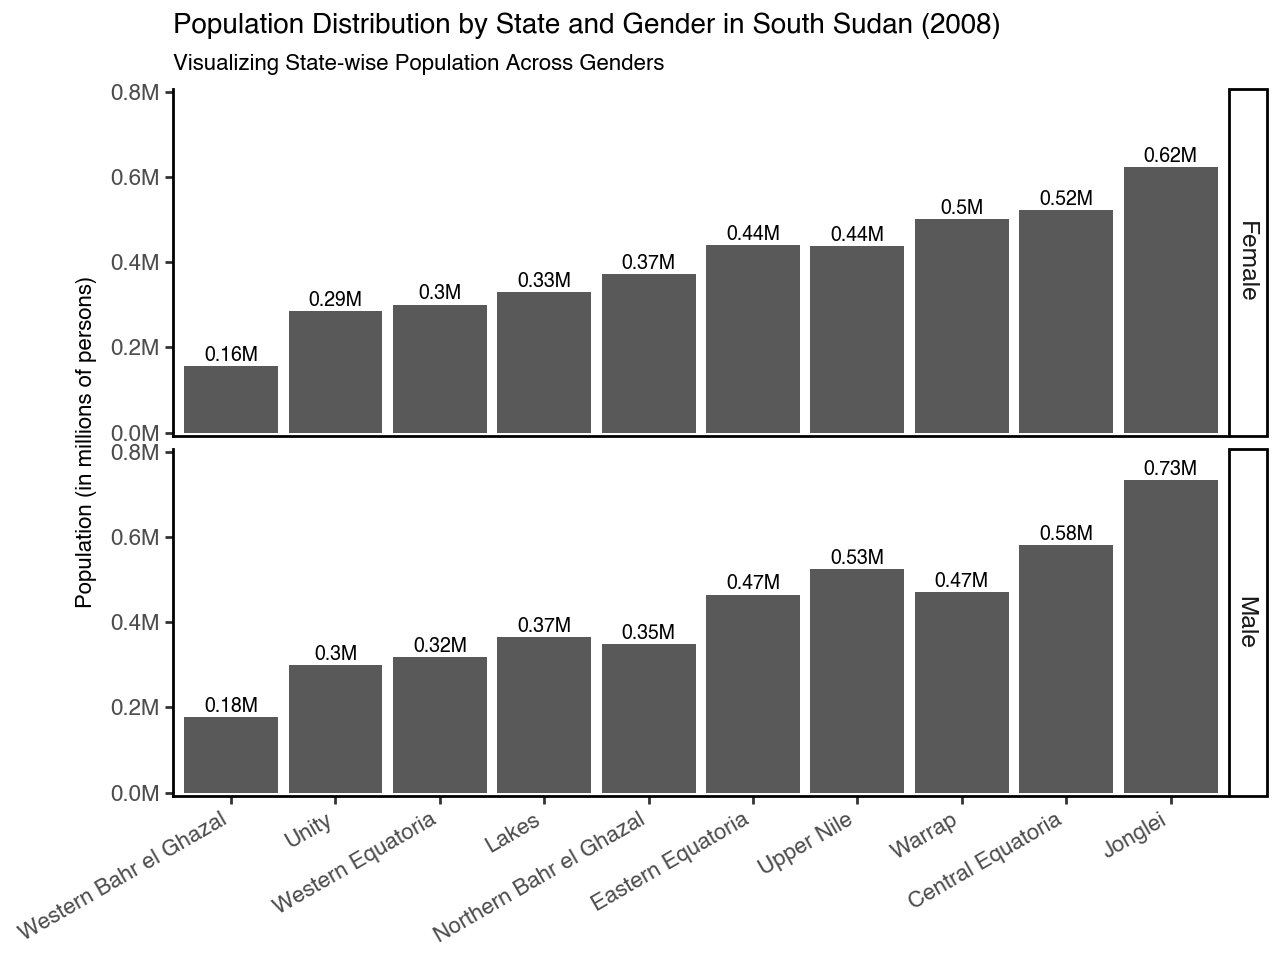

In [33]:

(
    ggplot(gender, aes('reorder(state, total)', 'total'))
    + geom_col(position='dodge')
    + geom_text(aes(label='labels'), format_string='{}M', nudge_y=25_000, size=7)
    + scale_x_discrete(expand=(0.01, 0.01))
    + scale_y_continuous(
        limits=(0, 800_000), 
        expand=(0.01, 0.01),
        labels=label_number(scale=1e-6, suffix='M')
    )
    + facet_grid('gender', scales='free_y')
    + theme_classic()
    + labs(
        x='',
        y='Population (in millions of persons)',
        title='Population Distribution by State and Gender in South Sudan (2008)',
        subtitle='Visualizing State-wise Population Across Genders'
    )
    + theme(
        plot_title=element_text(size=10, margin={'t': 10, 'b': 5}, ha='left'),
        plot_subtitle=element_text(size=8, margin={'b': 5}, ha='left'),
        axis_text=element_text(size=8),
        axis_text_x=element_text(rotation=30, hjust=1),
        axis_title_y=element_text(size=8)
    )
)

For better visibility, I will flip the axes once again.

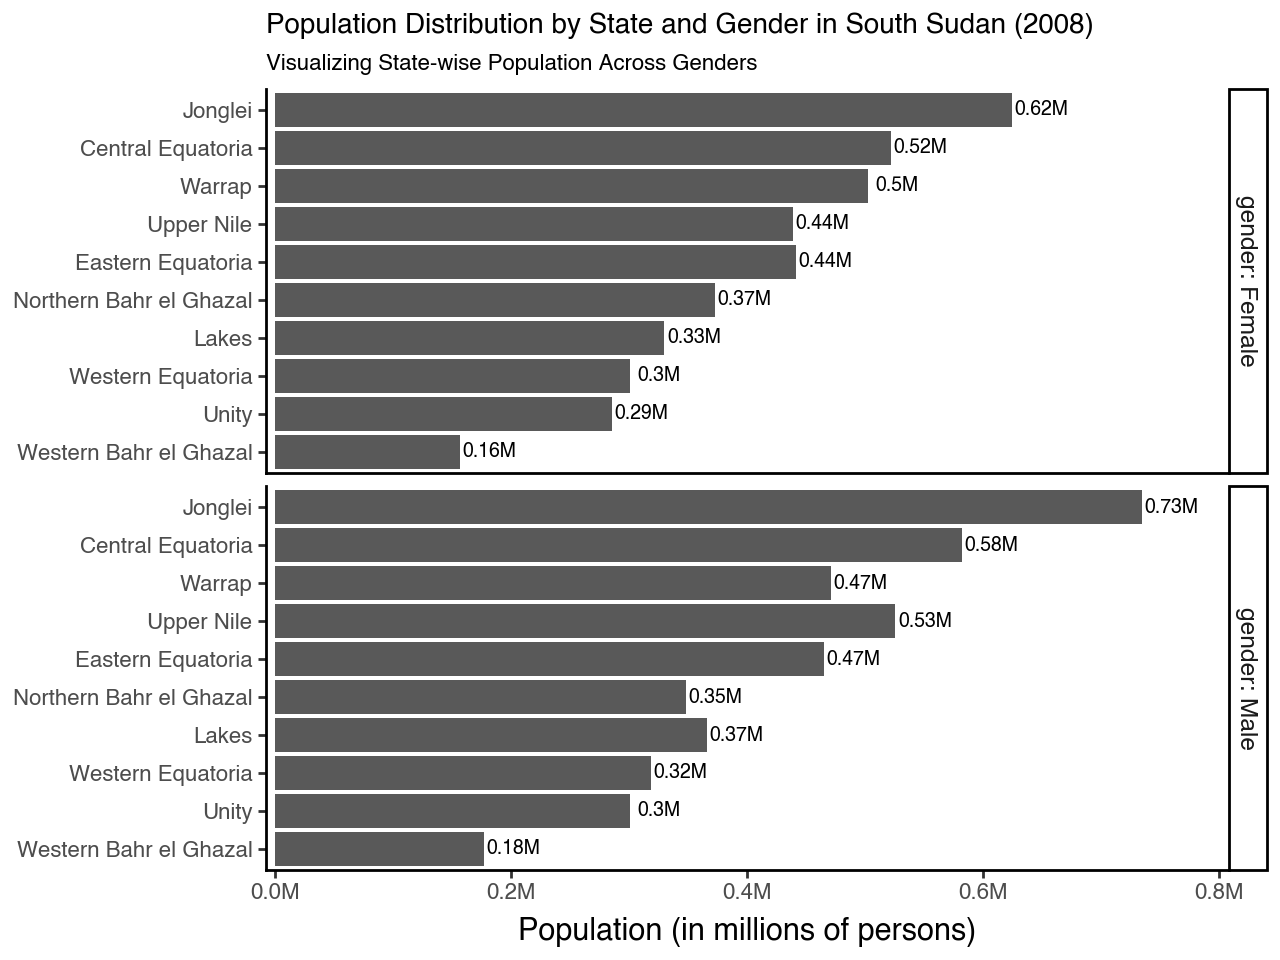

In [24]:

(
    ggplot(gender, aes('reorder(state, total)', 'total'))
    + geom_col(position='dodge')
    + geom_text(aes(label='labels'), format_string='{}M', nudge_y=25_000, size=7)
    + scale_x_discrete(expand=(0.01, 0.01))
    + scale_y_continuous(
        limits=(0, 800_000), 
        expand=(0.01, 0.01),
        labels=label_number(scale=1e-6, suffix='M')
    )
    + facet_grid('gender', scales='free_y', labeller='label_both')
    + coord_flip()
    + theme_classic()
    + labs(
        x='',
        y='Population (in millions of persons)',
        title='Population Distribution by State and Gender in South Sudan (2008)',
        subtitle='Visualizing State-wise Population Across Genders'
    )
    + theme(
        plot_title=element_text(size=10, margin={'t': 10, 'b': 5}),
        plot_subtitle=element_text(size=8, margin={'b': 5}),
        axis_text=element_text(size=8),
        axis_title_y=element_text(size=8)
    )
)

# Closing Remarks

This tutorial has demonstrated how to create bar graphs using the plotnine package. We began by loading necessary libraries and importing the South Sudan 2008 census data, which was cleaned and transformed using custom functions from my censuspy module.

Initially, I grouped the data by age category and visualized it using various plotnine functions. Starting with the canvas initialized by ggplot(), I added bars with geom_col() and refined the plot for a professional appearance. Subsequently, I applied similar steps to group and summarize data by state and gender columns, illustrating both side-by-side bar plots and transformations with coord_flip() for improved clarity.

To enhance the visual further, I used facet_grid() to separate the plot by gender, which improved understanding and visual appeal. While this tutorial aimed to provide a general overview of the plotnine package rather than an exhaustive explanation of each function, I hope it has been informative.

I invite your feedback on how this tutorial can be improved and encourage you to share it with your network if you found it beneficial.

# Acknowledgements

I am grateful to Andrei Mircea Stoian for sharing the reorder() function with me.

# Resources

- [plotnine Official Documentation](https://plotnine.org/)